In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import io

from src.utils.file import get_data_file_path

#%load_ext autoreload

In [182]:
# Experiment 1: Fix events n, increase formulas n, to have (accuracy, precision, recall, f1) for each model, draw line chart 
# Experiment 2: Fix formulas n, increase events n, to have (accuracy, precision, recall, f1) for each model, draw line chart

# Data Presentation

In [183]:
path = get_data_file_path(event_n=3, formula_n=3, count=300)
data = pd.read_csv(path)

In [184]:
data.head()

,context,query,question,code,formula,answer,graph
0,"Initially, event3 happened. After event1, even...",C1: Event1 happens or event2 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(X ((event1 | event2) & event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
1,"Initially, event1 happened. After event3, no o...",C1: Event2 will happen eventually.\nC2: That e...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2,...",(G (event2 -> (F event2))),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
2,"Initially, event2 happened. After event2, even...",C1: Event3 will happen at next time.\nC2: Even...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",((X event3) -> (X event3)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
3,"Initially, event3 happened. After event1, even...",C1: Event2 happens and event3 happens.\nC2: Ev...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! (event1 | (event2 & event3))),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
4,"Initially, event2 happened. After event1, even...",C1: Event3 happens or event3 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! ((event3 | event3) | event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."


In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   context   300 non-null    object
 1   query     300 non-null    object
 2   question  300 non-null    object
 3   code      300 non-null    object
 4   formula   300 non-null    object
 5   answer    300 non-null    bool  
 6   graph     300 non-null    object
dtypes: bool(1), object(6)
memory usage: 14.5+ KB


In [186]:
# Context
print(data.loc[0, 'context'])

Initially, event3 happened. After event1, event2 will happen. After event2, event1 will happen. After event3, event1 will happen.


In [187]:
# Query 
print(data.loc[0, 'query'])

C1: Event1 happens or event2 happens.
C2: C1 holds and event1 happens.
C3: C2 will happen at next time.


In [188]:
# Question
print(data.loc[0, 'question'])

=== Context ===

Initially, event3 happened. After event1, event2 will happen. After event2, event1 will happen. After event3, event1 will happen.

=== Hypothesis ===

C1: Event1 happens or event2 happens.
C2: C1 holds and event1 happens.
C3: C2 will happen at next time.

C3 is True or False? Answer with "True" or "False" directly:



In [189]:
# Code
print(data.loc[0, 'code'])

MODULE main
VAR
    state : {event1, event2, event3};
ASSIGN
    init(state) := event3;
    next(state) := case
        state = event1 : event2;
		state = event2 : event1;
		state = event3 : event1;
    esac;
LTLSPEC (X (((state=event1) | (state=event2)) & (state=event1)))



In [190]:
# Formula
print(data.loc[0, 'formula'])

(X ((event1 | event2) & event1))


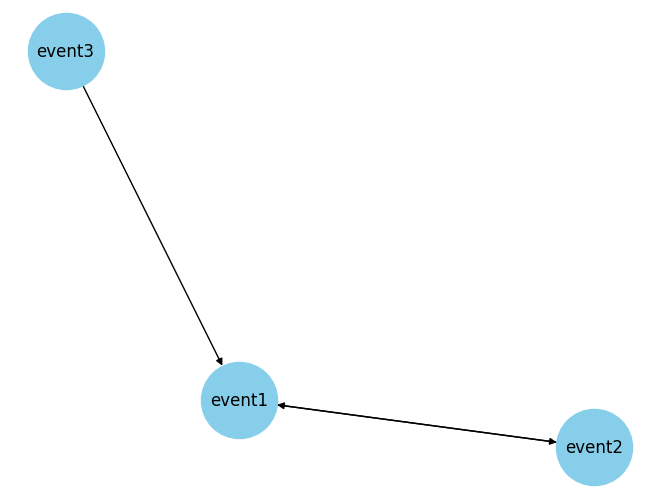

In [193]:
# Plot Graph
graph = nx.read_graphml(io.StringIO(data.loc[0, 'graph']))
nx.draw(graph, with_labels=True, node_size=3000, node_color='skyblue')
plt.show()

In [194]:
# Answer
print(data.loc[0, 'answer'])

True


# Prediction Presentation


In [216]:
from src.utils.file import get_evaluation_file_path

path = get_evaluation_file_path(event_n=3, formula_n=3, count=300, model="qwen:7b-chat")

In [217]:
data.head()

,context,query,question,code,formula,answer,graph,prediction,prediction_raw
0,"Initially, event1 happened. After event1, even...",C1: Event2 will always happen at any future ti...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2}...",((G event2) | ((G event2) -> (G event2))),1,"<graphml xmlns=""http://graphml.graphdrawing.or...",1,True
1,"Initially, event1 happened. After event1, no o...",C1: Event1 does not happen.\nC2: C1 will happe...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2}...",(! (! (event1 | (X (! event1))))),1,"<graphml xmlns=""http://graphml.graphdrawing.or...",0,False
2,"Initially, event2 happened. After event2, even...",C1: Event2 will happen eventually.\nC2: That e...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2}...",((event2 -> (F event2)) -> (event2 -> (F event...,1,"<graphml xmlns=""http://graphml.graphdrawing.or...",1,True
3,"Initially, event1 happened. After event1, no o...",C1: Event1 happens or event2 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2}...",(((event1 | event2) | event1) -> ((event1 | ev...,1,"<graphml xmlns=""http://graphml.graphdrawing.or...",0,False
4,"Initially, event2 happened. After event2, even...",C1: That event2 happens implies that event2 ha...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2}...",(event2 -> ((event2 -> event2) & (F (event2 ->...,1,"<graphml xmlns=""http://graphml.graphdrawing.or...",1,True


In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   context         300 non-null    object
 1   query           300 non-null    object
 2   question        300 non-null    object
 3   code            300 non-null    object
 4   formula         300 non-null    object
 5   answer          300 non-null    int64 
 6   graph           300 non-null    object
 7   prediction      300 non-null    int64 
 8   prediction_raw  300 non-null    object
dtypes: int64(2), object(7)
memory usage: 21.2+ KB


In [226]:
# Accuracy
print(f'{len(data[data['answer'] == data['prediction']]) / len(data)}%')

0.5966666666666667%


In [228]:
# Prediction Distribution
data['prediction'].value_counts()

prediction
0    195
1    105
Name: count, dtype: int64

In [230]:
# Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(data['answer'], data['prediction'], average='macro')
recall = recall_score(data['answer'], data['prediction'], average='macro')
f1 = f1_score(data['answer'], data['prediction'], average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Precision: 0.6062271062271062
Recall: 0.5966666666666667
F1: 0.5873827791986359


# LLMs Evaluation

In [ ]:
# TODO